In [9]:
# Import all the nessecary packages
import os
import sys

# Be sure to install somo as a package with pip
from somo.sweep import iter_utils

import numpy as np
import pickle

In [10]:
# Define the configuration file to use and import both the real and simulated data

config_file = 'sweeps/fingergait_tuned.yaml'
folder = iter_utils.get_group_folder(iter_utils.load_yaml(config_file))

sim_data_path=os.path.join(folder,'param_set_0000','raw_data.pkl')
with open(sim_data_path,'rb') as f:
    sim_data = pickle.load(f)
    
with open('validation/pos_0000_planned_rep0000_pressures_and_object_pose.pkl','rb') as f:
    real_data = pickle.load(f)

## Process simulation data

In [12]:
# Define the keys to use when getting data from the (unnessecarily convoluted) simulated data

sim_data_actuation_keys = [ ['actuation', 'actuation_fingers0'],
                            ['actuation', 'actuation_fingers1'],
                            ['actuation', 'actuation_fingers2'],
                            ['actuation', 'actuation_fingers3'],
                            ['actuation', 'actuation_fingers4'],
                            ['actuation', 'actuation_fingers5'],
                            ['actuation', 'actuation_fingers6'],
                            ['actuation', 'actuation_fingers7'] ]

sim_data_actuation_times = ['actuation', 'timeStamp']


sim_data_objectpose_keys = [['objectpose', 'posX'],
                            ['objectpose', 'posY'],
                            ['objectpose', 'posZ'],
                            ['objectpose', 'eulerX'],
                            ['objectpose', 'eulerY'],
                            ['objectpose', 'eulerZ']]
sim_data_objectpose_scale = [1000, 1000, 1000, 1,1, 1]

sim_data_objectpose_times = ['objectpose', 'timeStamp']

In [13]:
# Get the nessecary simulation data and put it into some dictionaries

data = []
for idx, key in enumerate(sim_data_actuation_keys):
    data_curr = sim_data[key[0]][key[1]]
    data.append(data_curr)

sim_actuation = {}
sim_actuation['data'] = np.array(data).T.tolist()
sim_actuation['times'] = sim_data[sim_data_actuation_times[0]][sim_data_actuation_times[1]]


data = []
for idx, key in enumerate(sim_data_objectpose_keys):
    data_curr = sim_data[key[0]][key[1]]
    data_curr = np.array(data_curr)*sim_data_objectpose_scale[idx]
    data.append(data_curr)

sim_objectpose = {}
sim_objectpose['data'] = np.array(data).T.tolist()
sim_objectpose['times'] = sim_data[sim_data_objectpose_times[0]][sim_data_objectpose_times[1]]

## Process real data

In [15]:
# Define the keys to use when getting data from measured data

real_data_actuation_keys = [['pressure_control_pressure_data_measured','data']]

real_data_actuation_times = ['pressure_control_pressure_data_measured','times']

real_data_objectpose_keys = [['tag_detections_detections.[0].pose.pose.pose.position','data'],
                             ['tag_detections_detections.[0].pose.pose.pose.orientation','data']]
real_data_objectpose_scale = [1, 1]

real_data_objectpose_times = ['tag_detections_detections.[0].pose.pose.pose.orientation','times']

In [16]:
# Get the nessecary real data and put it into some dictionaries

data = []
for key in real_data_actuation_keys:
    data.append(real_data[key[0]][key[1]])

real_actuation = {}
real_actuation['data'] = np.array(data).T.tolist()
real_actuation['times'] = real_data[real_data_actuation_times[0]][real_data_actuation_times[1]]

data = []
for idx, key in enumerate(real_data_objectpose_keys):
    scale= real_data_objectpose_scale[idx]
    data_tmp = real_data[key[0]][key[1]]
    data_tmp = np.array(data_tmp)*scale
    
    if len(data)==0:
        data = data_tmp
    else:
        data = np.hstack((data,data_tmp))
                
real_objectpose = {}
real_objectpose['data'] = np.array(data).tolist()
real_objectpose['times'] = real_data[real_data_objectpose_times[0]][real_data_objectpose_times[1]]

## Plot the direct comparison of object pose between simulation and real system 


-0.37157612896407954
-6.695260824290187
-94.4501620068928

-0.26339044595715677
-6.602867924111379
-96.01096903672196

-0.041413307189941406
-0.22171110901368252
-81.32105000323386

-0.36799668717818707
-0.5823324822807479
-36.80642959552916

-0.20237680299823071
-0.8723814368303535
-76.80179856491081

-582.8016315805735
-535.9644895751214
8.738851718064673
(3, 2)


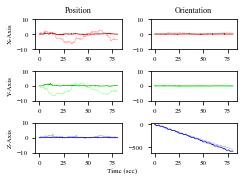

In [20]:
# Plot the direct comparison of object pose between simulation and real system 

num_axes = len(real_objectpose['data'][0])
num_rows, num_cols = 3,2

axis_order = [0,2,4,1,3,5]
axis_colors=[(0.8, 0, 0),
             (0, 0.8, 0),
             (0, 0 ,0.8),
             (0.8, 0, 0),
             (0, 0.8, 0),
             (0, 0, 0.8)]
start_at_0 = True

clip_sim=-1900
clip_real_start = 8

clip_start = 1.5 #sec

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] =7


real_data = np.array(real_objectpose['data'])
real_times = np.array(real_objectpose['times'])
sim_data = np.array(sim_objectpose['data'])
sim_times = np.array(sim_objectpose['times'])

real_data=real_data[clip_real_start:,:]
real_times=real_times[clip_real_start:]

if start_at_0:
    real_data = real_data-real_data[0,:]
    sim_data = sim_data-sim_data[0,:]
    
    real_times = real_times-real_times[0]
    sim_times = sim_times-sim_times[0]
    
sim_times_max = np.max(sim_times[0:clip_sim])
real_data = real_data[real_times<=sim_times_max,:]
real_times = real_times[real_times<=sim_times_max]


real_data = real_data[real_times>=clip_start,:]
sim_data = sim_data[sim_times>=clip_start,:]
real_times = real_times[real_times>=clip_start]
sim_times = sim_times[sim_times>=clip_start]

real_data = real_data-real_data[0,:]
sim_data = sim_data-sim_data[0,:]

real_times = real_times-real_times[0]
sim_times = sim_times-sim_times[0]

#fig, ax = plt.subplots(num_rows, num_cols, figsize=(3.4,2.8))
fig, ax = plt.subplots(num_rows, num_cols, figsize=(3.4,2.5))
fig.patch.set_facecolor('w')

all_ax = []
for ax_i in ax:
    for ax_ii in ax_i:
        all_ax.append(ax_ii)
    

for idx in range(num_axes):
    order = axis_order[idx]
    plt.sca(all_ax[order])
    #plt.subplot(num_rows,num_cols,axis_order[idx])
    plt.plot(real_times, real_data[:,idx], '-',
             color=np.clip(np.array(axis_colors[idx])+[0.7,0.7,0.7],0,1),
             linewidth=0.75)
    plt.plot(sim_times[0:clip_sim], sim_data[0:clip_sim,idx], '-',
             color=axis_colors[idx],
             linewidth=0.75)
    
    min_sim = np.min(sim_data[:,idx])
    min_real = np.min(real_data[:,idx])
    print("")
    print(min_sim)
    print(min_real)
    print(100*(min_sim-min_real)/min_real)
            
plt.sca(ax[0,0])
plt.title('Position')
plt.ylabel('X-Axis')

plt.sca(ax[0,1])
plt.title('Orientation')

plt.sca(ax[1,0])
plt.ylabel('Y-Axis')

plt.sca(ax[-1,0])
plt.ylabel('Z-Axis')
plt.sca(ax[-1,0])


print(ax.shape)

plt.sca(ax[0,0])
plt.ylim(-10,10)

plt.sca(ax[1,0])
plt.ylim(-10,10)

plt.sca(ax[2,0])
plt.ylim(-10,10)

plt.sca(ax[0,1])
plt.ylim(-10,10)

plt.sca(ax[1,1])
plt.ylim(-10,10)





fig.text(0.5, 0.04, 'Time (sec)', ha='center')

plt.sca(ax[0,1])
#plt.legend(['Real Hardware','SoMo Simulation'],frameon=False)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.savefig('validation/ihm_rot_gait_comparison.png', dpi=450)
plt.savefig('validation/ihm_rot_gait_comparison.svg', dpi=450)

(6, 2095)
(2095, 6)


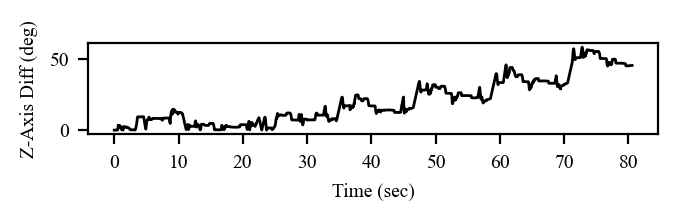

In [21]:
# Plot the error in z-orientation between the simulated and real systems

axis_use = 5

axis_order = [0,2,4,1,3,5]
axis_colors=[(0, 0, 0),
             (0, 0.8, 0),
             (0, 0 ,0.8),
             (0.8, 0, 0),
             (0, 0.8, 0),
             (0, 0, 0)]
start_at_0 = True

clip_sim=-1900

real_time_shift = 0

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] =7


if start_at_0:
    real_data = real_data-real_data[0,:]
    sim_data = sim_data-sim_data[0,:]


from scipy.interpolate import interp1d

max_time = (max(sim_times[0:clip_sim]))

sim_fun = interp1d(sim_times[0:clip_sim],sim_data[0:clip_sim,:].T)

real_times_cropped = real_times[real_times<=max_time]
real_data_cropped  = real_data[real_times<=max_time,:]

print(sim_fun(real_times_cropped).shape)
print(real_data_cropped.shape)


# Make the absolute diff graph
diff = (real_data_cropped - sim_fun(real_times_cropped).T)   
fig, ax = plt.subplots(1, 1, figsize=(3.4,1.0), dpi=200)
fig.patch.set_facecolor('w')
idx = axis_use
plt.plot(real_times_cropped, np.abs(diff[:,idx]), '-',
         color=axis_colors[idx],
         linewidth=1.0)
    

plt.xlabel('Time (sec)')
plt.ylabel('Z-Axis Diff (deg)')

#plt.legend(['Real Hardware','SoMo Simulation'],frameon=False)
plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)

plt.savefig('validation/ihm_rot_gait_error.png', dpi=450)
plt.savefig('validation/ihm_rot_gait_error.svg', dpi=450)

8
(16268, 8)
(83737, 8)

-16.000000000000004
-0.9800000190734863
1532.653029448587

0.0
-0.7300000190734863
-100.0

-16.000000000000004
-8.849999904632568
80.7909624001774

0.0
-8.170000314712524
-100.0

-16.000000000000004
-1.0199999809265137
1468.6274803129365

0.0
-1.1399998664855957
-100.0

-16.000000000000004
-8.579999923706055
86.48018813838108

0.0
-8.369999885559082
-100.0


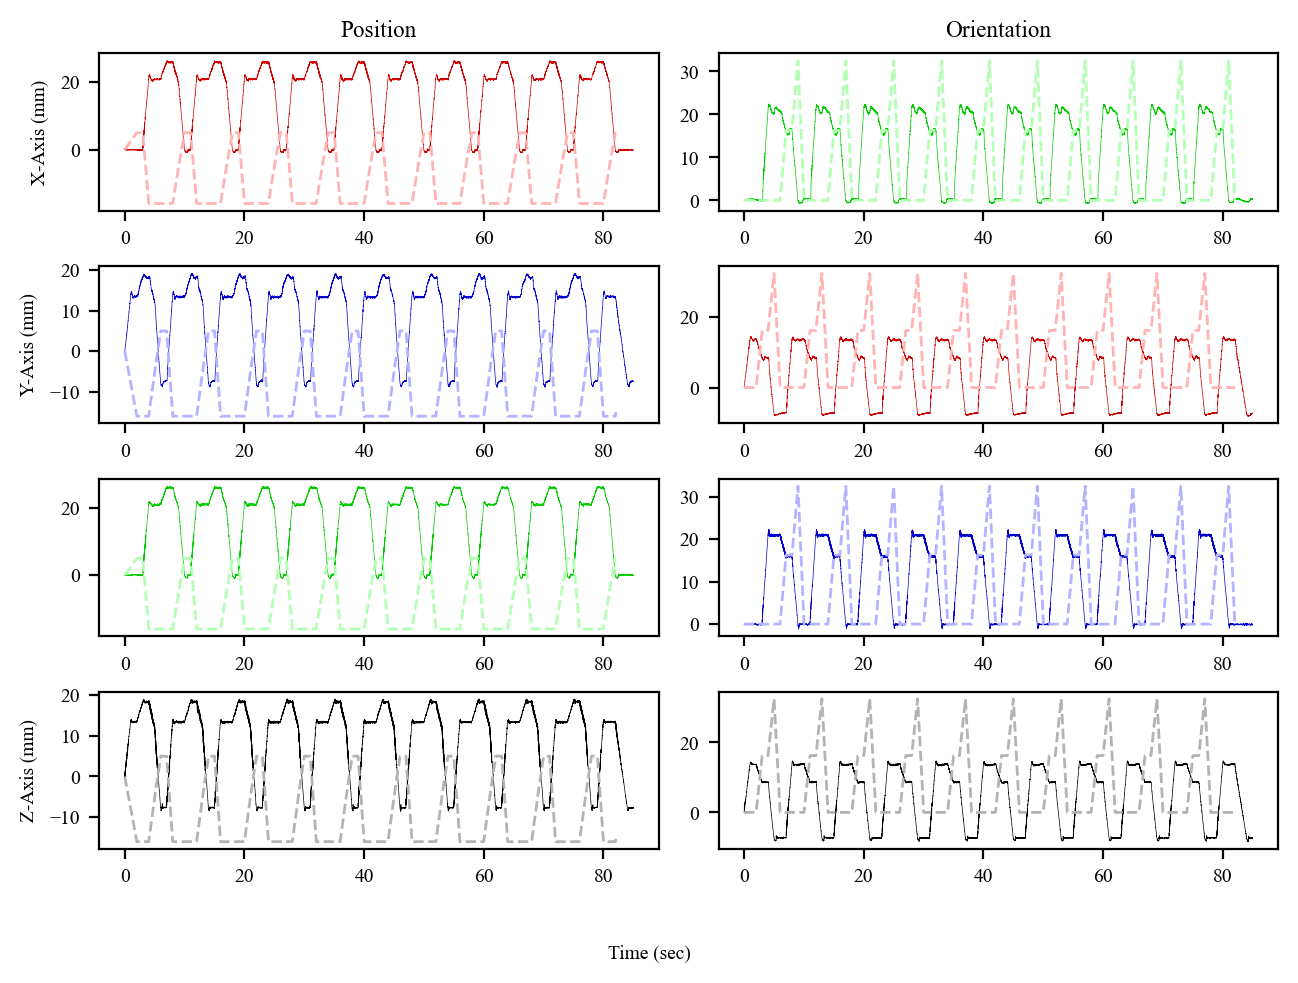

In [22]:
# Plot the actuation trajectories of both reh simulated and real system.
# This is less-useful since the real data uses differential pressure and
# the simulations use orthogonal actuation torques.abs
#
# This is mostly a sanity-check

num_axes = len(real_actuation['data'])
print(num_axes)
num_rows, num_cols = 4,2

axis_order = [0,1,2,3,4,5,6,7]
axis_colors=[(0.8, 0, 0),
             (0, 0.8, 0),
             (0, 0 ,0.8),
             (0.8, 0, 0),
             (0, 0.8, 0),
             (0, 0, 0.8),
             (0, 0, 0),
             (0, 0, 0)]
start_at_0 = True

clip_sim=-1900

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] =7


real_data = np.array(real_actuation['data'])
real_times = np.array(real_actuation['times'])
sim_data = np.array(sim_actuation['data'])*200
sim_times = np.array(sim_actuation['times'])

real_data = np.squeeze(real_data).T
sim_data = sim_data

print(real_data.shape)
print(sim_data.shape)

if start_at_0:
    real_data = real_data-real_data[0,:]
    sim_data = sim_data-sim_data[0,:]

fig, ax = plt.subplots(num_rows, num_cols, figsize=(6.5,5.0), dpi=200)
fig.patch.set_facecolor('w')

all_ax = []
for ax_i in ax:
    for ax_ii in ax_i:
        all_ax.append(ax_ii)
    

for idx in range(num_axes):
    order = axis_order[idx]
    plt.sca(all_ax[order])
    #plt.subplot(num_rows,num_cols,axis_order[idx])
    plt.plot(real_times, real_data[:,idx], '-',
             color=axis_colors[idx],
             linewidth=0.25)
    plt.plot(sim_times[0:clip_sim], sim_data[0:clip_sim,idx], '--',
             color=np.clip(np.array(axis_colors[idx])+[0.7,0.7,0.7],0,1),
             linewidth=1.0)
    
    min_sim = np.min(sim_data[:,idx])
    min_real = np.min(real_data[:,idx])
    print("")
    print(min_sim)
    print(min_real)
    print(100*(min_sim-min_real)/min_real)
            
plt.sca(ax[0,0])
plt.title('Position')
plt.ylabel('X-Axis (mm)')

plt.sca(ax[0,1])
plt.title('Orientation')

plt.sca(ax[1,0])
plt.ylabel('Y-Axis (mm)')

plt.sca(ax[-1,0])
plt.ylabel('Z-Axis (mm)')
plt.sca(ax[-1,0])

fig.text(0.5, 0.04, 'Time (sec)', ha='center')

plt.sca(ax[0,1])
#plt.legend(['Real Hardware','SoMo Simulation'],frameon=False)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.savefig('validation/ihm_rot_gait_actuation.png', dpi=450)
plt.savefig('validation/ihm_rot_gait_actuation.svg', dpi=450)